Linear Regression → MSE: 0.556, RMSE: 0.746, R2: 0.576
Ridge Regression → MSE: 0.556, RMSE: 0.746, R2: 0.576
Lasso Regression → MSE: 0.548, RMSE: 0.740, R2: 0.582


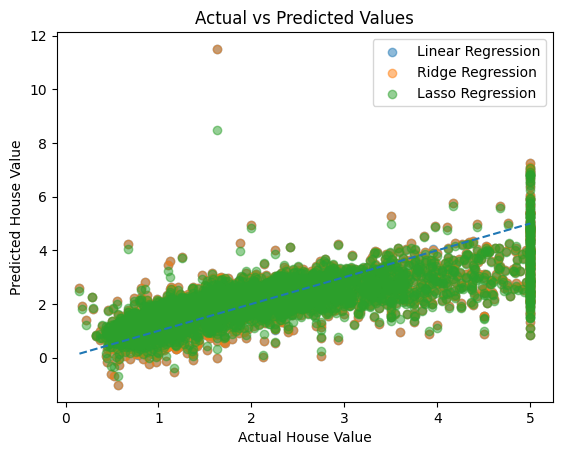

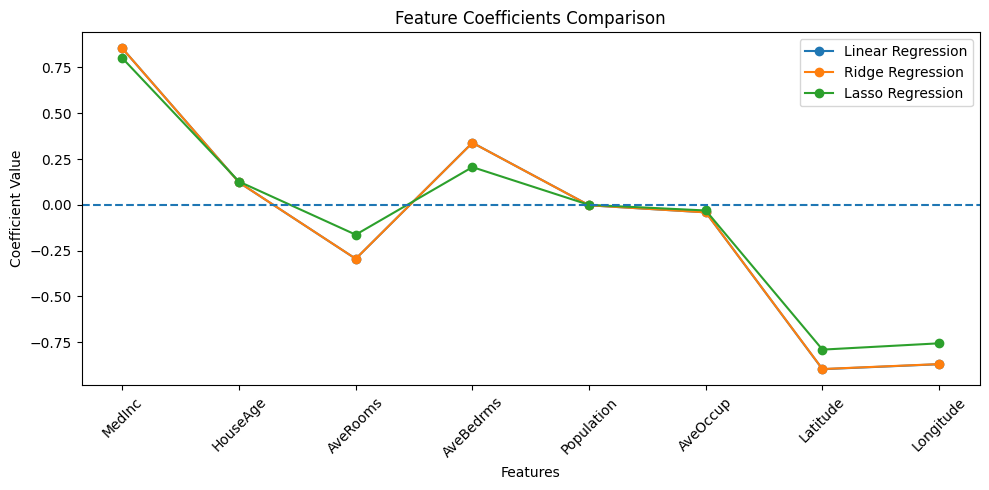

In [ ]:
# =========================================
# MULTIPLE, RIDGE & LASSO REGRESSION
# VISUALIZATION - SINGLE CELL
# =========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------
# Load Dataset
# -------------------------
data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
feature_names = X.columns

# -------------------------
# Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# Feature Scaling
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Model Training
# -------------------------
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# -------------------------
# Predictions
# -------------------------
lr_pred = lr.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

# -------------------------
# Evaluation
# -------------------------
def print_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MSE: {mse:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

print_metrics("Linear Regression", y_test, lr_pred)
print_metrics("Ridge Regression", y_test, ridge_pred)
print_metrics("Lasso Regression", y_test, lasso_pred)

# -------------------------
# PLOT 1: ACTUAL vs PREDICTED
# -------------------------
plt.figure()
plt.scatter(y_test, lr_pred, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, ridge_pred, alpha=0.5, label="Ridge Regression")
plt.scatter(y_test, lasso_pred, alpha=0.5, label="Lasso Regression")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

# -------------------------
# PLOT 2: FEATURE vs COEFFICIENT VALUES
# -------------------------
plt.figure(figsize=(10, 5))
plt.plot(feature_names, lr.coef_, label="Linear Regression", marker="o")
plt.plot(feature_names, ridge.coef_, label="Ridge Regression", marker="o")
plt.plot(feature_names, lasso.coef_, label="Lasso Regression", marker="o")
plt.axhline(0, linestyle="--")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients Comparison")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
